In [34]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

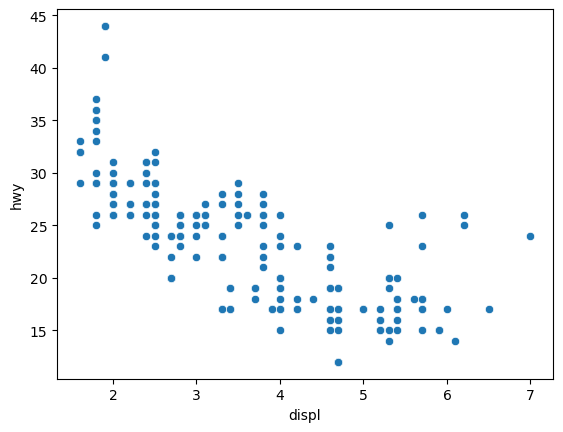

In [35]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

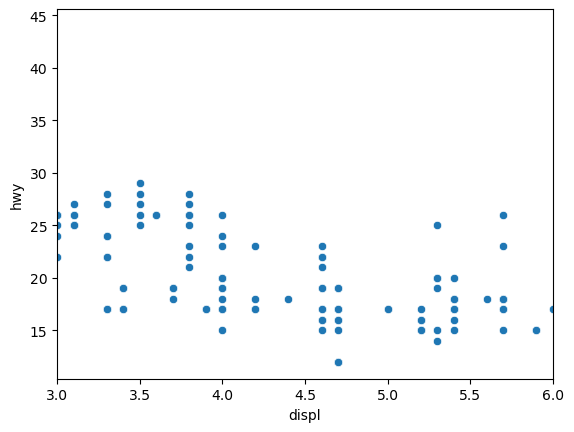

In [36]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3,6])

[(3.0, 6.0), (10.0, 30.0)]

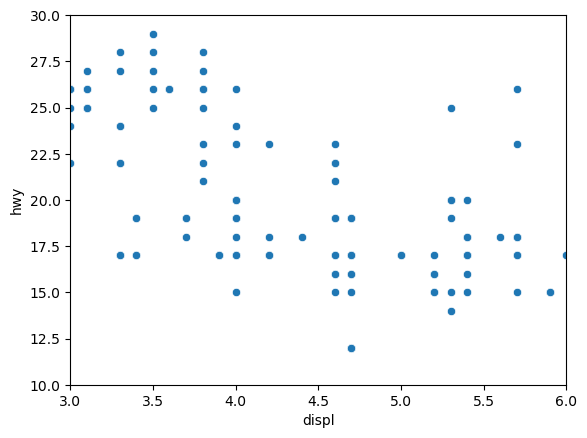

In [37]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy').set(xlim = [3,6], ylim = [10,30])

<Axes: xlabel='displ', ylabel='hwy'>

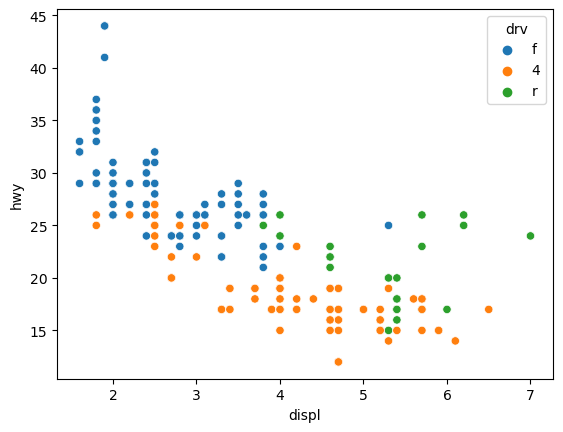

In [38]:
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

<Axes: xlabel='cty', ylabel='hwy'>

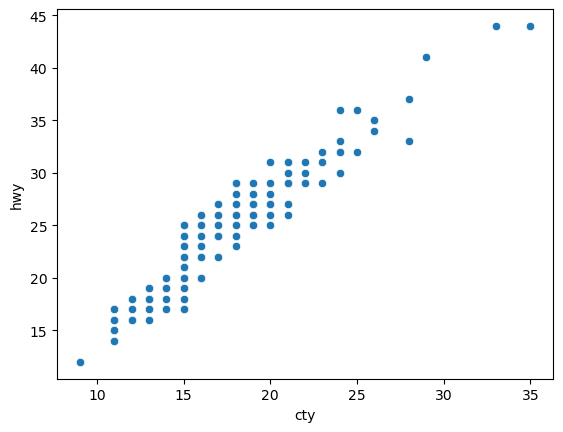

In [39]:
mpg = pd.read_csv('mpg.csv')
sns.scatterplot(data = mpg, x = 'cty', y = 'hwy')

[(0.0, 500000.0), (0.0, 10000.0)]

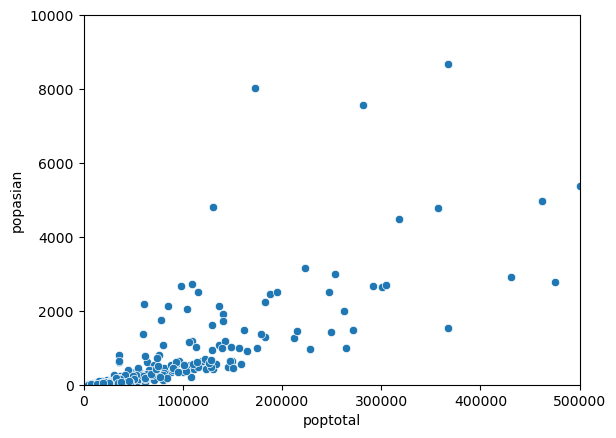

In [40]:
midwest = pd.read_csv('midwest.csv')

sns.scatterplot(data = midwest, x = 'poptotal', y = 'popasian') \
    .set(xlim = (0, 500000), ylim = (0, 10000))

In [41]:
df_mpg = mpg.groupby('drv') \
    .agg(mean_hwy = ('hwy', 'mean'))
    
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [42]:
df_mpg = mpg.groupby('drv', as_index=False) \
    .agg(mean_hwy = ('hwy', 'mean'))
    
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

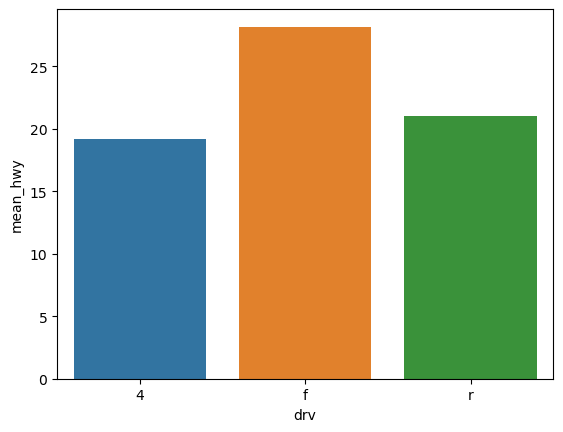

In [43]:
sns.barplot(data=df_mpg, x = 'drv', y = 'mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

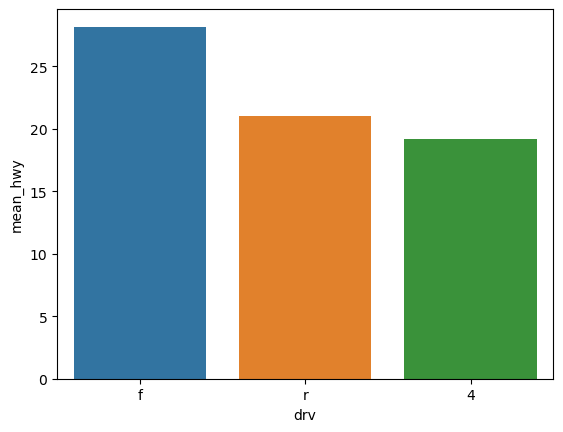

In [44]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False)

sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

In [45]:
df_mpg = mpg.groupby('drv', as_index=False) \
    .agg(n = ('drv', 'count'))
    
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

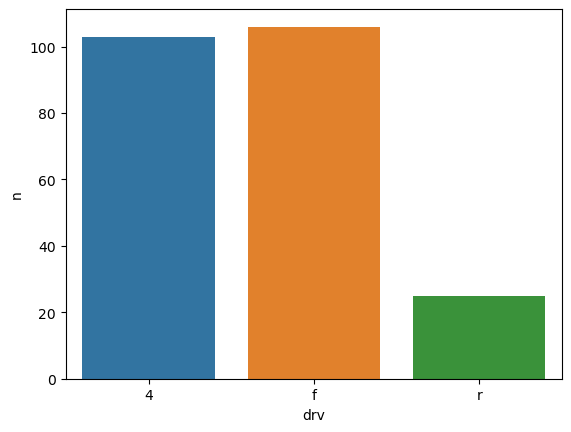

In [46]:
sns.barplot(data = df_mpg, x = 'drv', y = 'n')

<Axes: xlabel='drv', ylabel='count'>

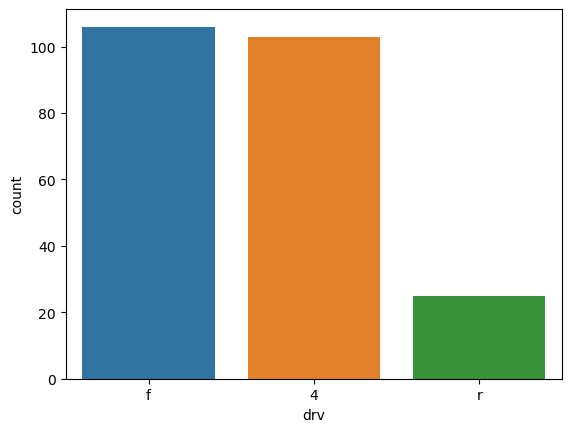

In [47]:
sns.countplot(data = mpg, x = 'drv')

In [48]:
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

In [49]:
df_mpg['drv'].unique()

array(['4', 'f', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

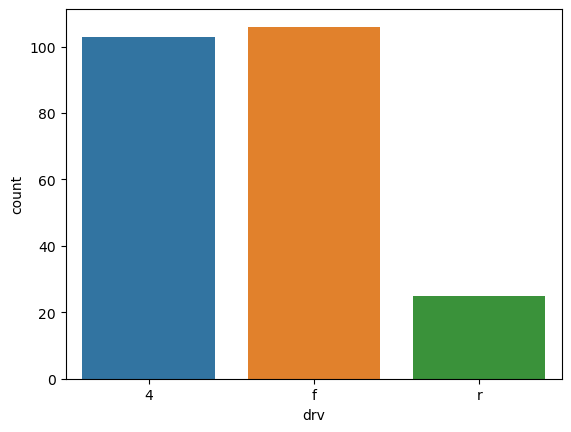

In [50]:
sns.countplot(data = mpg, x = 'drv', order= ['4','f','r'])

In [51]:
mpg['drv'].value_counts().index

Index(['f', '4', 'r'], dtype='object')

<Axes: xlabel='drv', ylabel='count'>

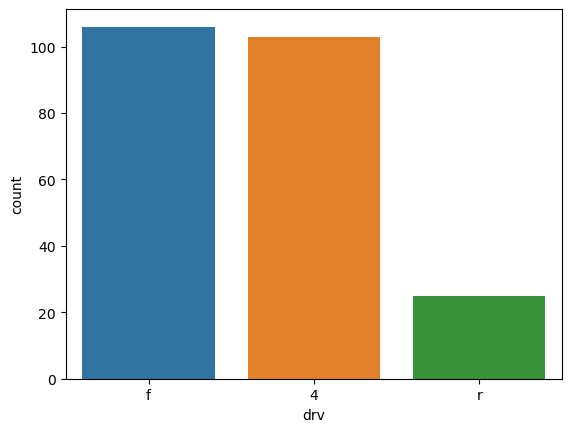

In [52]:
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

In [53]:
mpg = pd.read_csv('mpg.csv')

df = mpg.query('category == "suv"') \
    .groupby('manufacturer', as_index=False) \
    .agg(mean_cty = ('cty','mean')) \
    .sort_values('mean_cty', ascending=False) \
    .head()
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

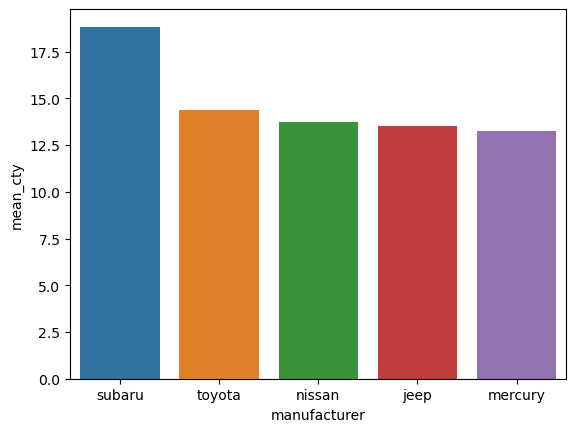

In [54]:
sns.barplot(data = df, x = 'manufacturer', y = 'mean_cty')

In [55]:
df_mpg = mpg.groupby('category', as_index=False) \
    .agg(n = ('category', 'count')) \
    .sort_values('n', ascending=False)
df_mpg

,category,n
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<Axes: xlabel='category', ylabel='n'>

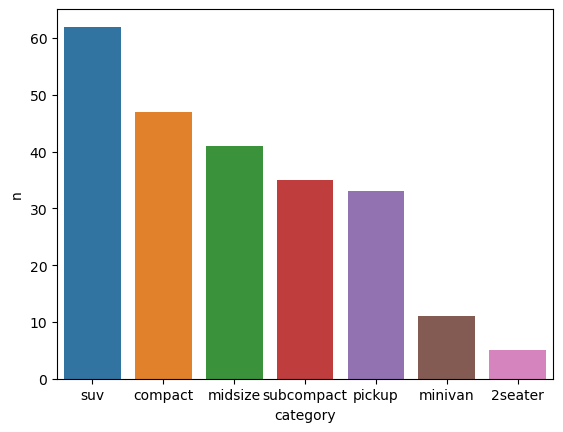

In [56]:
sns.barplot(data = df_mpg, x = 'category', y = 'n')

In [57]:
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

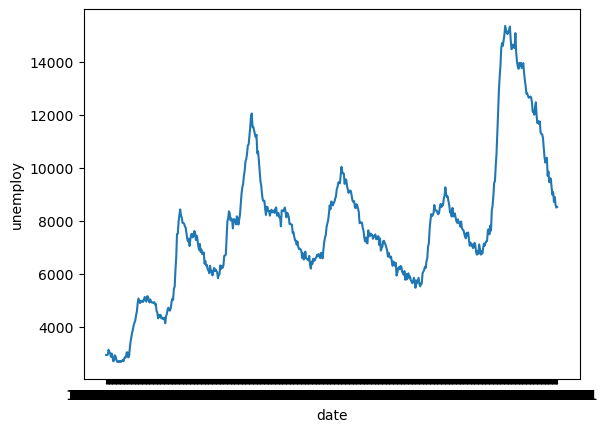

In [58]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [59]:
economics['date2'] = pd.to_datetime(economics['date'])

economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [60]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [61]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [62]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int64

In [63]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int64

In [64]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

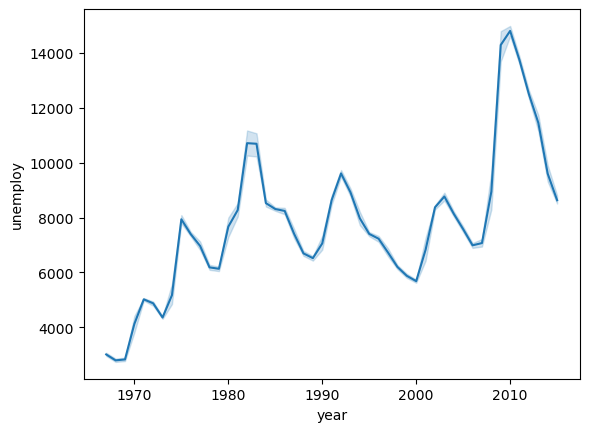

In [65]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

C:\Users\User\AppData\Local\Temp\ipykernel_2436\1184434843.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)


<Axes: xlabel='year', ylabel='unemploy'>

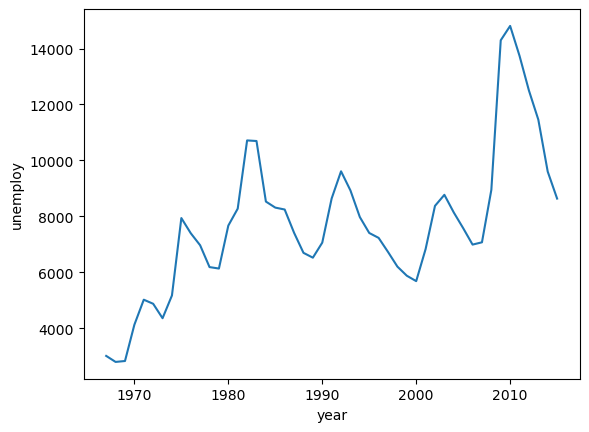

In [66]:
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

C:\Users\User\AppData\Local\Temp\ipykernel_2436\803714463.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'psavert', ci = None)


<Axes: xlabel='year', ylabel='psavert'>

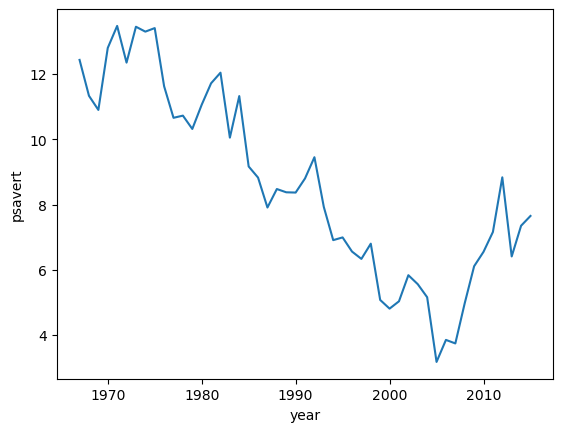

In [68]:
economics = pd.read_csv('economics.csv')

economics['date2'] = pd.to_datetime(economics['date'])

economics['year'] = economics['date2'].dt.year

sns.lineplot(data = economics, x = 'year', y = 'psavert', ci = None)

C:\Users\User\AppData\Local\Temp\ipykernel_2436\3955971820.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_2014, x = 'month', y = 'psavert', ci = None)


<Axes: xlabel='month', ylabel='psavert'>

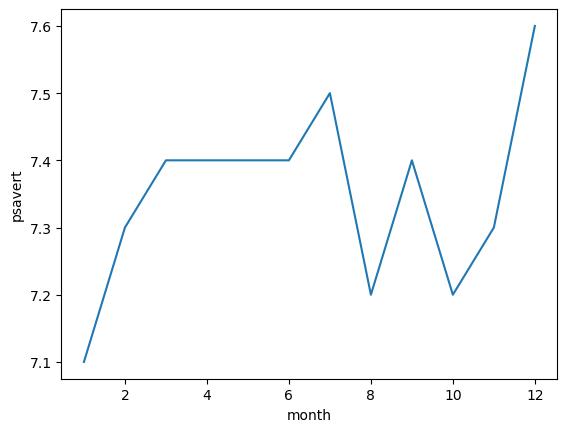

In [69]:
economics['month'] = economics['date2'].dt.month

df_2014 = economics.query('year == 2014')

sns.lineplot(data = df_2014, x = 'month', y = 'psavert', ci = None)

<Axes: xlabel='drv', ylabel='hwy'>

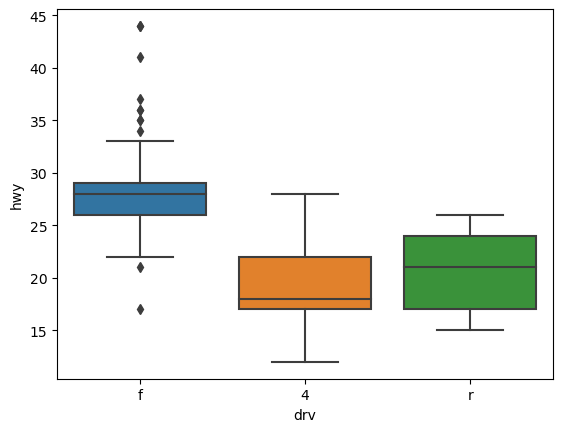

In [70]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')

<Axes: xlabel='category', ylabel='cty'>

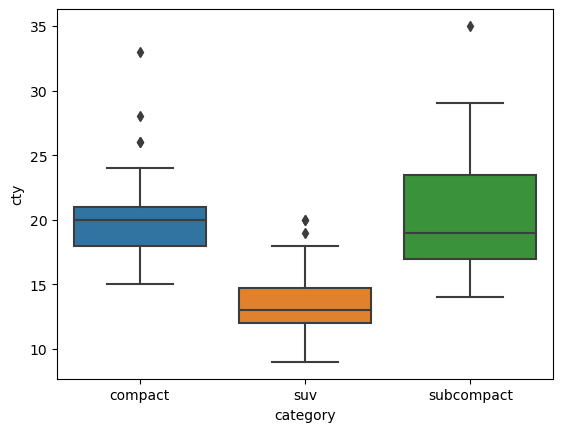

In [72]:
mpg = pd.read_csv('mpg.csv')

df = mpg.query('category in ["compact", "subcompact", "suv"]')

sns.boxplot(data= df, x = 'category', y = 'cty')